# Фінальний проект 

## Аналіз продажів в італійському бістро

##  Ознайомлення та обробка даних

In [92]:
#імпорт необхідних бібліотек

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [94]:
#завантажуємо файл
df = pd.read_excel('../data_gen/italian_restaurant_sales.xlsx')

In [95]:
#дивимося загальну інформацію про датасет
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              10000 non-null  object 
 1   Time              10000 non-null  object 
 2   Menu Item         10000 non-null  object 
 3   Category          10000 non-null  object 
 4   Quantity          10000 non-null  int64  
 5   Price (per item)  10000 non-null  float64
 6   Revenue           10000 non-null  float64
 7   Payment Method    10000 non-null  object 
 8   Customer Type     10000 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 703.2+ KB


In [97]:
#перевіряємо наявність пустих значень
df.isnull().sum()

Date                0
Time                0
Menu Item           0
Category            0
Quantity            0
Price (per item)    0
Revenue             0
Payment Method      0
Customer Type       0
dtype: int64

In [96]:
#перевіряємо наявність дублікатів
df.duplicated().sum()

0

In [50]:
df.head()

,date,time,menu_item,category,quantity,price_per_item,revenue,payment_method,customer_type
0,2024-11-23,1900-01-01 03:48:00,Margherita Pizza,Main Course,3,10.0,30.0,Credit Card,Dine-In
1,2024-03-12,1900-01-01 03:29:00,Caprese Salad,Appetizer,1,8.0,8.0,Mobile Payment,Takeaway
2,2024-01-17,1900-01-01 01:01:00,Tiramisu,Dessert,2,6.5,13.0,Credit Card,Delivery
3,2024-11-04,1900-01-01 00:54:00,Caprese Salad,Appetizer,2,8.0,16.0,Mobile Payment,Delivery
4,2024-12-25,1900-01-01 18:36:00,Gelato,Dessert,2,4.5,9.0,Cash,Delivery


In [98]:
#для зручності перейменовуємо стовпці
df.rename(columns = {'Menu Item': 'menu_item', 'Price (per item)': 'price_per_item', 'Payment Method': 'payment_method', 'Customer Type': 'customer_type'}, inplace = True)

In [99]:
#переводимо назви стовпців у нижній регістр
df.columns = df.columns.str.lower()

In [100]:
#дивимося як виглядає наша таблиця
df.head()

,date,time,menu_item,category,quantity,price_per_item,revenue,payment_method,customer_type
0,2024-11-23,03:48 AM,Margherita Pizza,Main Course,3,10.0,30.0,Credit Card,Dine-In
1,2024-03-12,03:29 AM,Caprese Salad,Appetizer,1,8.0,8.0,Mobile Payment,Takeaway
2,2024-01-17,01:01 AM,Tiramisu,Dessert,2,6.5,13.0,Credit Card,Delivery
3,2024-11-04,12:54 AM,Caprese Salad,Appetizer,2,8.0,16.0,Mobile Payment,Delivery
4,2024-12-25,06:36 PM,Gelato,Dessert,2,4.5,9.0,Cash,Delivery


In [101]:
#змінюємо тип даних колонок дати та часу на тип datetime
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

In [102]:
df['time'] = pd.to_datetime(df['time'], format='%I:%M %p')

In [103]:
#перевіряємо чи змінили тип
print(df['date'].dtype)

datetime64[ns]


In [104]:
print(df['time'].dtype)

datetime64[ns]


# Щоб проаналізувати рік роботи бістро, знайдемо декілька важливих показників.

Яка страва принесла найбільший дохід?

In [58]:
#створимо зведену таблицю щоб побачити яка страва приносить більший дохід
pivot_dishes = df.pivot_table(values='revenue', index='menu_item', aggfunc='sum')
pivot_dishes = pivot_dishes.sort_values(by='revenue', ascending=False)

pivot_dishes

,revenue
menu_item,
Fettuccine Alfredo,40157.0
Spaghetti Carbonara,35796.0
Lasagna,34488.5
Margherita Pizza,29140.0
Caprese Salad,22568.0
Minestrone Soup,20930.0
Tiramisu,20462.0
Panna Cotta,16588.0
Bruschetta,14110.0


Згідно отриманої таблиці можемо сказати, що паста Fetuccine Alfredo принесла найбільше доходу, а морозиво - найменше.
Можемо припустити,що більшу частину доходу бістро отримало з основних страв,але поглянемо яка зі страв була популярною за 2024 рік.

In [106]:
#визначимо яку страву замовляли найчастіше за рік
pivot_quantity = df.pivot_table(values='quantity', index='menu_item', aggfunc='sum')
pivot_quantity = pivot_quantity.sort_values(by='quantity', ascending=False)  
pivot_quantity

,quantity
menu_item,
Tiramisu,3148
Fettuccine Alfredo,3089
Panna Cotta,3016
Lasagna,2999
Gelato,2998
Minestrone Soup,2990
Spaghetti Carbonara,2983
Margherita Pizza,2914
Bruschetta,2822


Найчастіше клієнти замовляли тірамісу,а паста Альфредо на другому місці за популярністю. Також можна зазначити,що в цілому десерти дуже популярні в бістро та входять у топ-5 по кількості замовлень.
Перевіримо який дохід принесла кожна категорія з меню.

In [107]:
#визначимо який дохід принесла кожна з категорій страв
pivot_category_revenue = df.pivot_table(values='revenue', index='category', aggfunc='sum')
pivot_category_revenue = pivot_category_revenue.sort_values(by='revenue', ascending=False)
pivot_category_revenue


,revenue
category,
Main Course,139581.5
Appetizer,57608.0
Dessert,50541.0


Отже,головні страви приносять найбільше доходу, з десертів найменше та апетизири принесли бістро на 14% більше доходу ніж десерти.
Припустимо,що ціни на десерти набагато нижчі за основні страви,тому навіть не дивлячись на кількість замовлень,десерти приносять менший відсоток від усього доходу.

In [108]:
#визначимо найдорожчу та найдешевшу страву у меню
pivot_price_range = df.pivot_table(values='price_per_item', index='menu_item')
pivot_price_range = pivot_price_range.sort_values(by='price_per_item', ascending=False)
pivot_price_range


,price_per_item
menu_item,
Fettuccine Alfredo,13.0
Spaghetti Carbonara,12.0
Lasagna,11.5
Margherita Pizza,10.0
Caprese Salad,8.0
Minestrone Soup,7.0
Tiramisu,6.5
Panna Cotta,5.5
Bruschetta,5.0


Подивимось як розподіляється кількість замовлень за категоріями

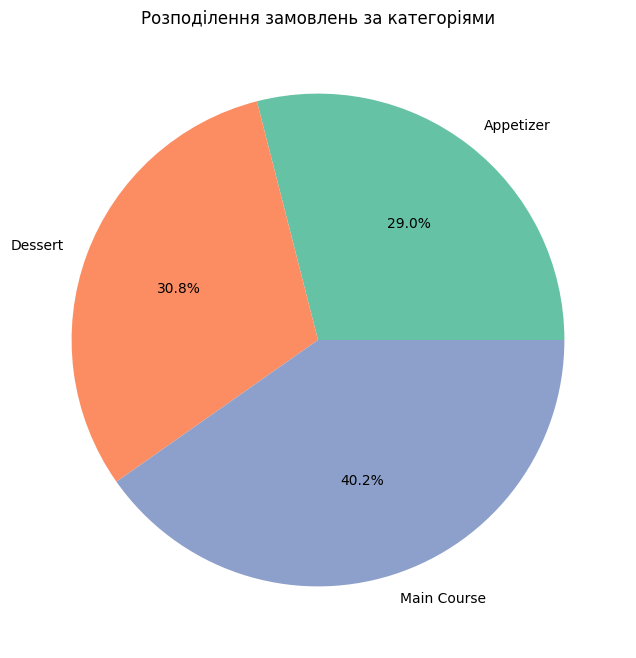

In [110]:
# знаходимо суму замовлень за категоріями
category_order_counts = df.groupby('category')['quantity'].sum()

# побудова діаграми
plt.figure(figsize=(8, 8))
category_order_counts.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('Set2'))
plt.title('Розподілення замовлень за категоріями')
plt.ylabel('')
plt.show()


Можемо впевнено сказати,що страви з основного меню замовляють частіше,а десерти та апетизири майже однаково.
Перевіримо чи впливає пора року на кількість замовлень.

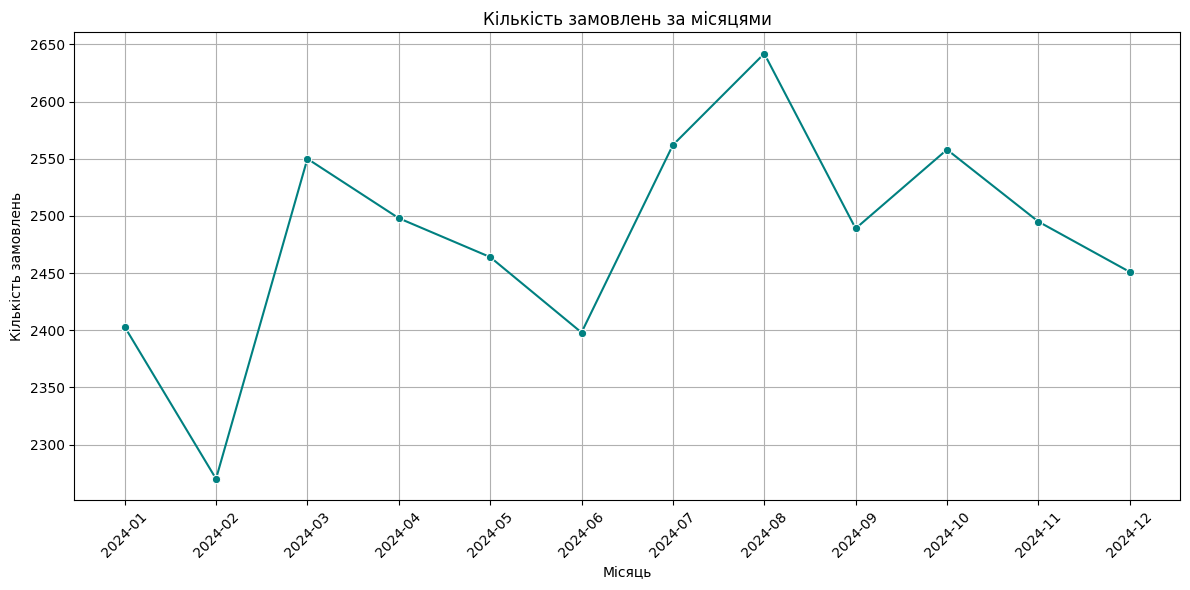

In [112]:
# створимо стовпці з роком та місяцем
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.strftime('%Y-%m')

# групуємо за місяцем та рахуємо кількість замовлень
monthly_orders = df.groupby('month')['quantity'].sum()

# будуємо лінійний графік
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_orders, marker='o', color='teal')
plt.title('Кількість замовлень за місяцями')
plt.xlabel('Місяць')
plt.ylabel('Кількість замовлень')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()





Можна побачити,що у зимові місяці менша кількість замовлень та також зменшується їх кількість у червні (можливо через відпустки/канікули)

А чи є залежність між категорією страви та порою року?Можливо морозиво частіше замовляють влітку,а не взимку

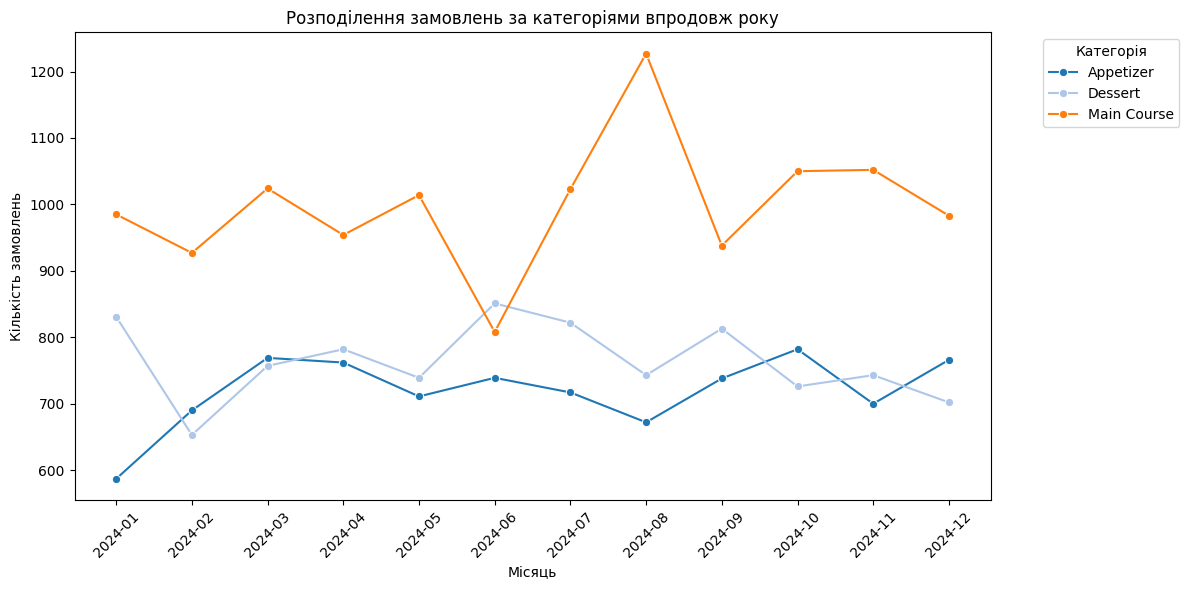

In [113]:
# Групуємо дані за категорією, місяцем та роком та сумуємо за кількістю замовлень
category_orders_monthly = df.groupby(['year', 'month', 'category'])['quantity'].sum().reset_index()

# будуємо лінійний графік
plt.figure(figsize=(12, 6))
sns.lineplot(data=category_orders_monthly, x='month', y='quantity', hue='category', marker='o', palette='tab20')
plt.title('Розподілення замовлень за категоріями впродовж року')
plt.xlabel('Місяць')
plt.ylabel('Кількість замовлень')
plt.xticks(rotation=45)
plt.legend(title='Категорія', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


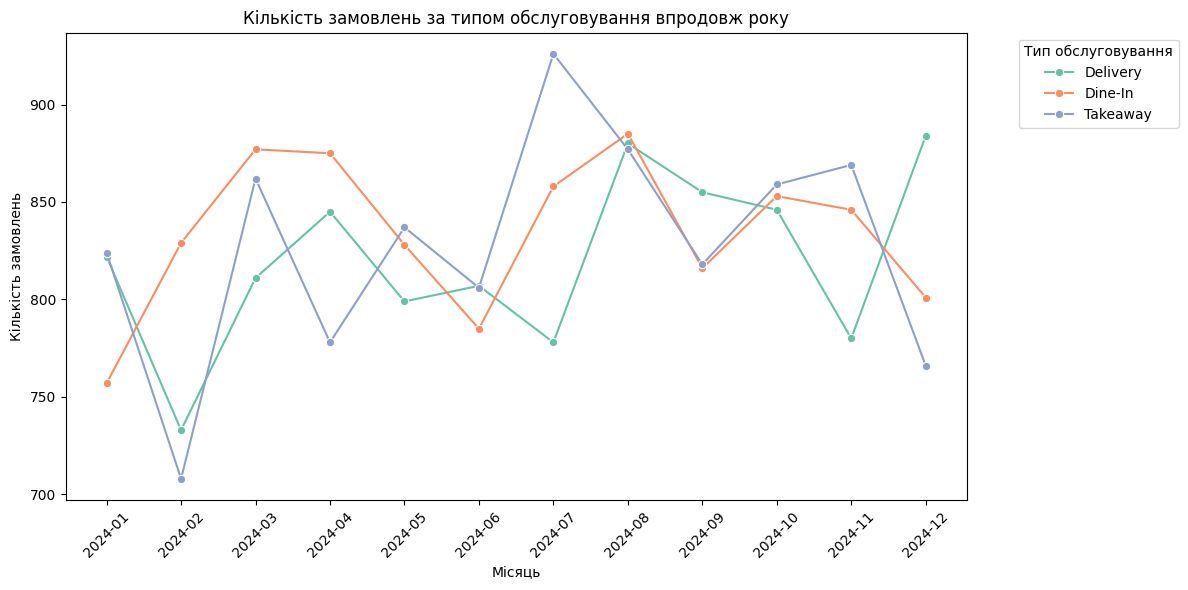

In [88]:
# Групуємо дані за роком, місяцем та типом замовлення і рахуємо кількість замовлень
customer_type_monthly = df.groupby(['year', 'month', 'customer_type'])['quantity'].sum().reset_index()

# Будуємо лінійний графік
plt.figure(figsize=(12, 6))
sns.lineplot(data=customer_type_monthly, x='month', y='quantity', hue='customer_type', marker='o', palette='Set2')
plt.title('Кількість замовлень за типом обслуговування впродовж року')
plt.xlabel('Місяць')
plt.ylabel('Кількість замовлень')
plt.xticks(rotation=45)
plt.legend(title='Тип обслуговування', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


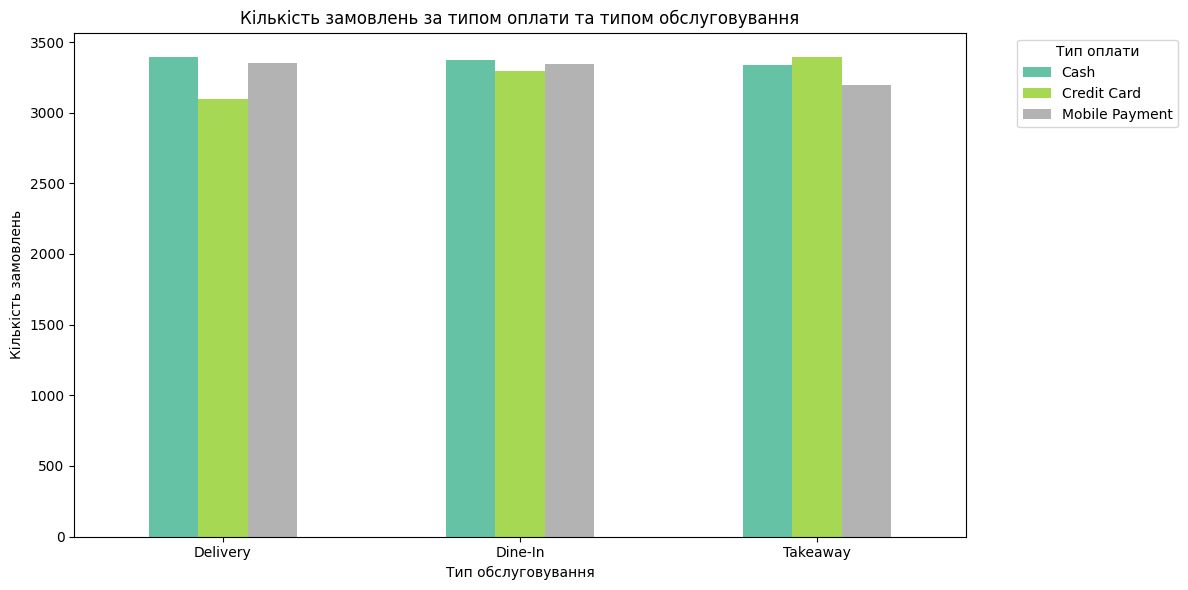

In [91]:
# Групуємо дані за типом обслуговування, типом оплати та рахуємо кількість замовлень
payment_service_orders = df.groupby(['customer_type', 'payment_method'])['quantity'].sum().unstack(fill_value=0)

# будуємо стовпчасту діаграму
payment_service_orders.plot(kind='bar', figsize=(12, 6), colormap='Set2')
plt.title('Кількість замовлень за типом оплати та типом обслуговування')
plt.xlabel('Тип обслуговування')
plt.ylabel('Кількість замовлень')
plt.xticks(rotation=0) 
plt.legend(title='Тип оплати', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
